Goal of the study: Identify the variables with the highest impact on the final house price

## Exploratory Data Analysis

### Importing the libraries

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.set_option('max_columns', None)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

### Import dataset

In [206]:
df = pd.read_excel('Data/Data_MidTerm_Project_Real_State_Regression.xls')
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3     1.0000         1180      5650   
1      6414100192 2014-12-09         3     2.2500         2570      7242   
2      5631500400 2015-02-25         2     1.0000          770     10000   
3      2487200875 2014-12-09         4     3.0000         1960      5000   
4      1954400510 2015-02-18         3     2.0000         1680      8080   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3     2.5000         1530      1131   
21593  6600060120 2015-02-23         4     2.5000         2310      5813   
21594  1523300141 2014-06-23         2     0.7500         1020      1350   
21595   291310100 2015-01-16         3     2.5000         1600      2388   
21596  1523300157 2014-10-15         2     0.7500         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0      1.0000           0     0          3      7        1180              0   
1      2.0000           0     0          3      7        2170            400   
2      1.0000           0     0          3      6         770              0   
3      1.0000           0     0          5      7        1050            910   
4      1.0000           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21592  3.0000           0     0          3      8        1530              0   
21593  2.0000           0     0          3      8        2310              0   
21594  2.0000           0     0          3      7        1020              0   
21595  2.0000           0     0          3      8        1600              0   
21596  2.0000           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode     lat      long  sqft_living15  \
0          1955             0    98178 47.5112 -122.2570           1340   
1          1951          1991    98125 47.7210 -122.3190           1690   
2          1933             0    98028 47.7379 -122.2330           2720   
3          1965             0    98136 47.5208 -122.3930           1360   
4          1987             0    98074 47.6168 -122.0450           1800   
...         ...           ...      ...     ...       ...            ...   
21592      2009             0    98103 47.6993 -122.3460           1530   
21593      2014             0    98146 47.5107 -122.3620           1830   
21594      2009             0    98144 47.5944 -122.2990           1020   
21595      2004             0    98027 47.5345 -122.0690           1410   
21596      2008             0    98144 47.5941 -122.2990           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]

### Columns type

In [207]:
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

### Checking NULL values

In [208]:
display(df.isnull().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

**drop id column**

In [209]:
df = df.drop(['id'], axis=1)
df

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     2014-10-13         3     1.0000         1180      5650  1.0000   
1     2014-12-09         3     2.2500         2570      7242  2.0000   
2     2015-02-25         2     1.0000          770     10000  1.0000   
3     2014-12-09         4     3.0000         1960      5000  1.0000   
4     2015-02-18         3     2.0000         1680      8080  1.0000   
...          ...       ...        ...          ...       ...     ...   
21592 2014-05-21         3     2.5000         1530      1131  3.0000   
21593 2015-02-23         4     2.5000         2310      5813  2.0000   
21594 2014-06-23         2     0.7500         1020      1350  2.0000   
21595 2015-01-16         3     2.5000         1600      2388  2.0000   
21596 2014-10-15         2     0.7500         1020      1076  2.0000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          3      8        1530              0   
21593           0     0          3      8        2310              0   
21594           0     0          3      7        1020              0   
21595           0     0          3      8        1600              0   
21596           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode     lat      long  sqft_living15  \
0          1955             0    98178 47.5112 -122.2570           1340   
1          1951          1991    98125 47.7210 -122.3190           1690   
2          1933             0    98028 47.7379 -122.2330           2720   
3          1965             0    98136 47.5208 -122.3930           1360   
4          1987             0    98074 47.6168 -122.0450           1800   
...         ...           ...      ...     ...       ...            ...   
21592      2009             0    98103 47.6993 -122.3460           1530   
21593      2014             0    98146 47.5107 -122.3620           1830   
21594      2009             0    98144 47.5944 -122.2990           1020   
21595      2004             0    98027 47.5345 -122.0690           1410   
21596      2008             0    98144 47.5941 -122.2990           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 20 columns]

### Checking Columns

In [210]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [211]:
df['bathrooms'].value_counts()
#do we need to round the data?

2.5000    5377
1.0000    3851
1.7500    3048
2.2500    2047
2.0000    1930
1.5000    1445
2.7500    1185
3.0000     753
3.5000     731
3.2500     589
3.7500     155
4.0000     136
4.5000     100
4.2500      79
0.7500      71
4.7500      23
5.0000      21
5.2500      13
5.5000      10
1.2500       9
6.0000       6
0.5000       4
5.7500       4
6.7500       2
8.0000       2
6.2500       2
6.5000       2
7.5000       1
7.7500       1
Name: bathrooms, dtype: int64

In [212]:
df['floors'].value_counts()
#confirm the meaning no of floors per properties or location of flat

1.0000    10673
2.0000     8235
1.5000     1910
3.0000      611
2.5000      161
3.5000        7
Name: floors, dtype: int64

In [213]:
#df['waterfront'].np.astype= 'category'
df['waterfront'].dtypes

dtype('int64')

In [214]:
#need to clarify the meaning
df['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [215]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [216]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [217]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [218]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [219]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [220]:
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [221]:
df['sqft_lot15'].value_counts()

5000     427
4000     356
6000     288
7200     210
4800     145
        ... 
10170      1
10573      1
11477      1
1449       1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [222]:
df['price'].describe()

count     21597.0000
mean     540296.5735
std      367368.1401
min       78000.0000
25%      322000.0000
50%      450000.0000
75%      645000.0000
max     7700000.0000
Name: price, dtype: float64

Understanding the difference between sqft_living' and 'sqft_living15.  
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

In [223]:
df_size = df.filter(['sqft_living', 'sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15'])
df_size

sqft_living  sqft_above  sqft_lot  sqft_living15  sqft_lot15
0             1180        1180      5650           1340        5650
1             2570        2170      7242           1690        7639
2              770         770     10000           2720        8062
3             1960        1050      5000           1360        5000
4             1680        1680      8080           1800        7503
...            ...         ...       ...            ...         ...
21592         1530        1530      1131           1530        1509
21593         2310        2310      5813           1830        7200
21594         1020        1020      1350           1020        2007
21595         1600        1600      2388           1410        1287
21596         1020        1020      1076           1020        1357

[21597 rows x 5 columns]

In [224]:
df_size.describe()

sqft_living  sqft_above     sqft_lot  sqft_living15  sqft_lot15
count   21597.0000  21597.0000   21597.0000     21597.0000  21597.0000
mean     2080.3219   1788.5968   15099.4088      1986.6203  12758.2835
std       918.1061    827.7598   41412.6369       685.2305  27274.4420
min       370.0000    370.0000     520.0000       399.0000    651.0000
25%      1430.0000   1190.0000    5040.0000      1490.0000   5100.0000
50%      1910.0000   1560.0000    7618.0000      1840.0000   7620.0000
75%      2550.0000   2210.0000   10685.0000      2360.0000  10083.0000
max     13540.0000   9410.0000 1651359.0000      6210.0000 871200.0000

### Changing columns type into categorical variables

In [225]:
df['waterfront'] = pd.Categorical(df['waterfront'])
df['view'] = pd.Categorical(df['view'])
df['condition'] = pd.Categorical(df['condition'])
df['grade'] = pd.Categorical(df['grade'])

In [226]:
df.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [227]:
categorical = df.select_dtypes(include = ['category'])
categorical

waterfront view condition grade
0              0    0         3     7
1              0    0         3     7
2              0    0         3     6
3              0    0         5     7
4              0    0         3     8
...          ...  ...       ...   ...
21592          0    0         3     8
21593          0    0         3     8
21594          0    0         3     7
21595          0    0         3     8
21596          0    0         3     7

[21597 rows x 4 columns]

### Ordinal columns

In [228]:
categorical_ord = categorical[["waterfront", "view","condition","grade"]]
categories = [["0","1"], ["0", "1", "2","3","4"],["1","2","3","4","5"],
              ["1","2","3","4","5","6","7","8","9","10","11","12","13"]]

In [229]:
ordinal_encoder = OrdinalEncoder(categories=categories)
categorical_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(categorical_ord),columns=categorical_ord.columns)

In [230]:
categorical_ord_encoded

waterfront   view  condition  grade
0          0.0000 0.0000     2.0000 6.0000
1          0.0000 0.0000     2.0000 6.0000
2          0.0000 0.0000     2.0000 5.0000
3          0.0000 0.0000     4.0000 6.0000
4          0.0000 0.0000     2.0000 7.0000
...           ...    ...        ...    ...
21592      0.0000 0.0000     2.0000 7.0000
21593      0.0000 0.0000     2.0000 7.0000
21594      0.0000 0.0000     2.0000 6.0000
21595      0.0000 0.0000     2.0000 7.0000
21596      0.0000 0.0000     2.0000 6.0000

[21597 rows x 4 columns]

**Filtering the numerical variables:**

In [231]:
numerical = df.select_dtypes(include = ['int64', 'float'])
numerical

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3     1.0000         1180      5650  1.0000        1180   
1             3     2.2500         2570      7242  2.0000        2170   
2             2     1.0000          770     10000  1.0000         770   
3             4     3.0000         1960      5000  1.0000        1050   
4             3     2.0000         1680      8080  1.0000        1680   
...         ...        ...          ...       ...     ...         ...   
21592         3     2.5000         1530      1131  3.0000        1530   
21593         4     2.5000         2310      5813  2.0000        2310   
21594         2     0.7500         1020      1350  2.0000        1020   
21595         3     2.5000         1600      2388  2.0000        1600   
21596         2     0.7500         1020      1076  2.0000        1020   

       sqft_basement  yr_built  yr_renovated  zipcode     lat      long  \
0                  0      1955             0    98178 47.5112 -122.2570   
1                400      1951          1991    98125 47.7210 -122.3190   
2                  0      1933             0    98028 47.7379 -122.2330   
3                910      1965             0    98136 47.5208 -122.3930   
4                  0      1987             0    98074 47.6168 -122.0450   
...              ...       ...           ...      ...     ...       ...   
21592              0      2009             0    98103 47.6993 -122.3460   
21593              0      2014             0    98146 47.5107 -122.3620   
21594              0      2009             0    98144 47.5944 -122.2990   
21595              0      2004             0    98027 47.5345 -122.0690   
21596              0      2008             0    98144 47.5941 -122.2990   

       sqft_living15  sqft_lot15   price  
0               1340        5650  221900  
1               1690        7639  538000  
2               2720        8062  180000  
3               1360        5000  604000  
4               1800        7503  510000  
...              ...         ...     ...  
21592           1530        1509  360000  
21593           1830        7200  400000  
21594           1020        2007  402101  
21595           1410        1287  400000  
21596           1020        1357  325000  

[21597 rows x 15 columns]

### Distributions of numeric features

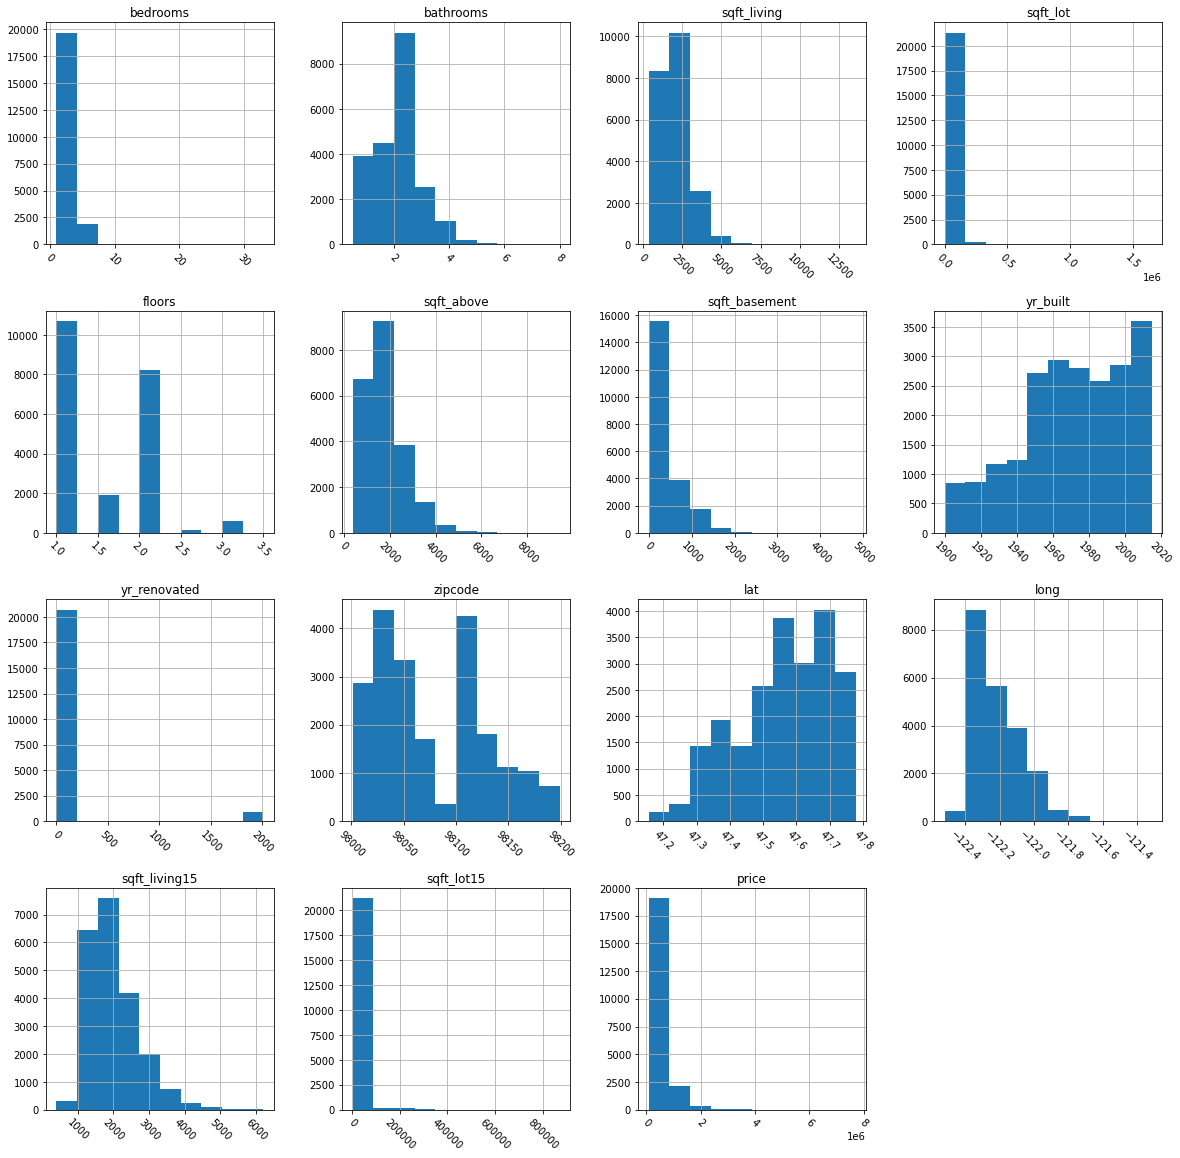

In [232]:
# Plot histogram grid
numerical.hist(figsize=(20,20), xrot=-45)
plt.show()

**Observations**:
- no Null value was detected

### Distribution of categorical variables

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


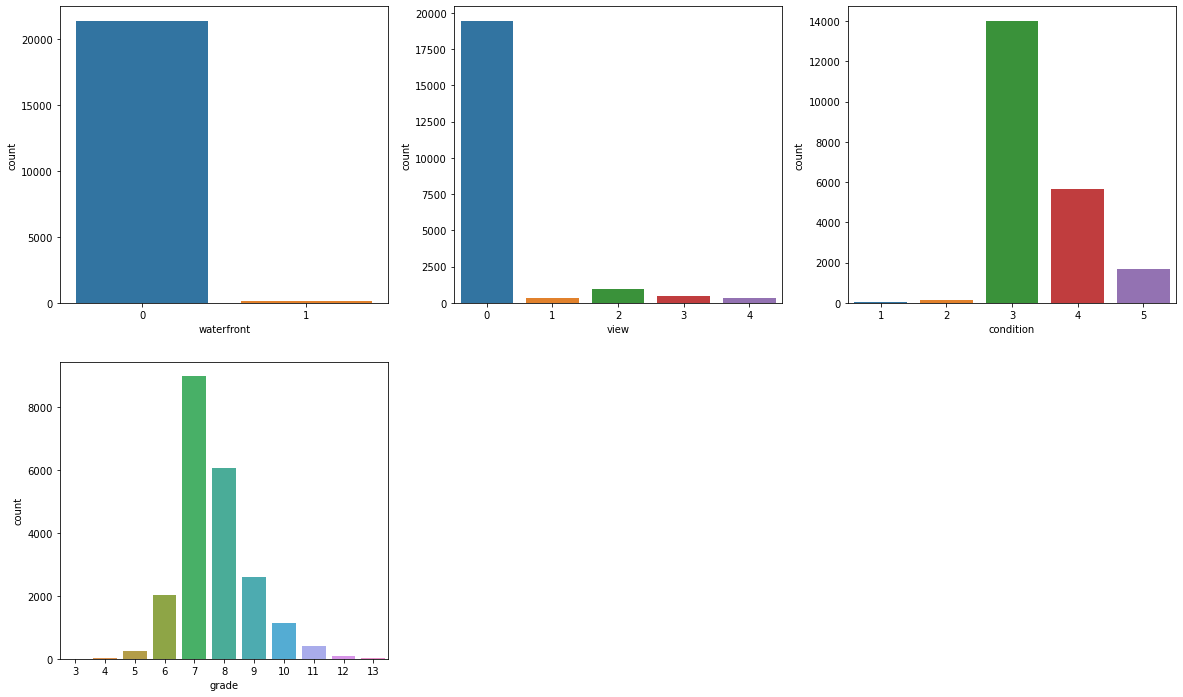

In [29]:
plt.figure(figsize=(20,12))
for i, column in enumerate(categorical,1):
    plt.subplot(2,3,i)
    sns.countplot(categorical[column])

**Observations**
- majority of properties has no view to waterfront
- majority of properties has a very low score in 'view' 
- most of properties has an average condition
- distribution of grade scoring of properties is near to normal

### Correlation

In [30]:
correlation_matrix = numerical.corr()

<AxesSubplot:title={'center':'Correlation Heatmap'}>

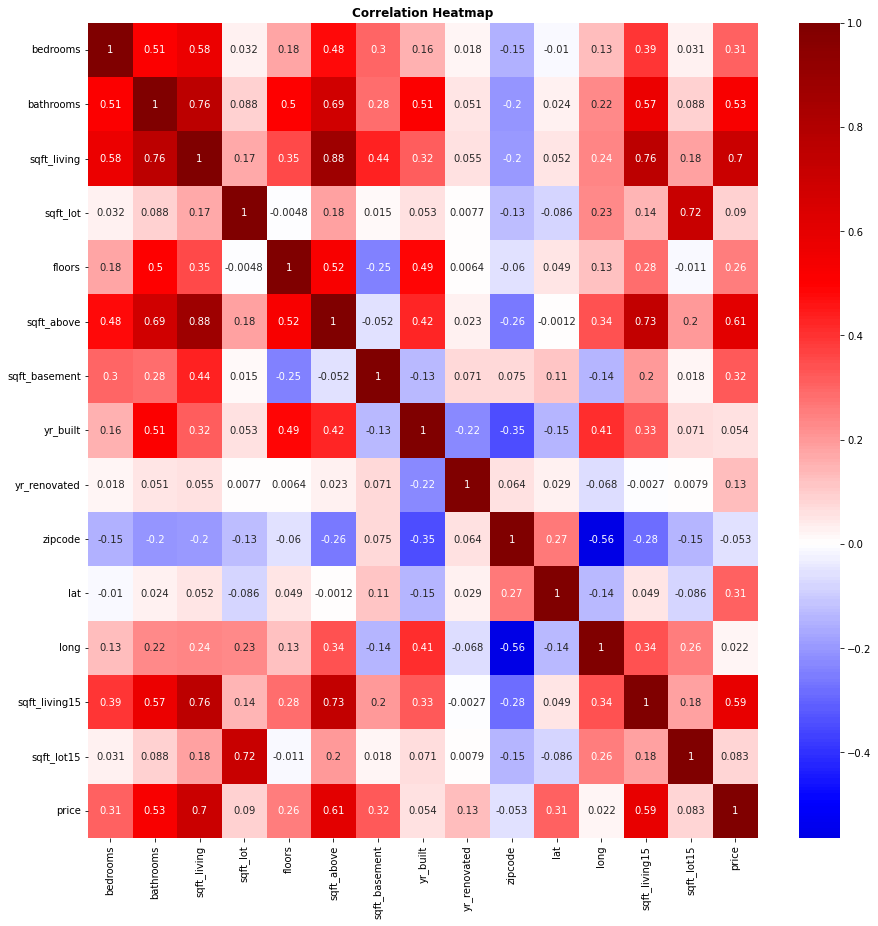

In [31]:
# create figure and axes
fig5, ax5 = plt.subplots(figsize = (15,15))

# set title
ax5.set_title('Correlation Heatmap', fontweight='bold')



sns.heatmap(correlation_matrix,  # the data for the heatmap
                          annot=True,  # show the actual values of correlation
                          cmap='seismic',  # provide the 'seismic' colormap
                          center=0,  # specify the value at which to center the colormap
                          )

**Observations**:
- sqft_above and sqft_living > 0.80
- (?) sqft_living15 and sqft_living = 0.76
- (?) sqft_lot and sqft_lot15 = 0.72

how do you plan to achieve it? We plan to check the correlation of the house price with features realted to location, size, distribution of living space, conditions

In [ ]:
## Numerical variables: removing outliers 

In [84]:
numerical

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3       1.00         1180      5650     1.0        1180   
1             3       2.25         2570      7242     2.0        2170   
2             2       1.00          770     10000     1.0         770   
3             4       3.00         1960      5000     1.0        1050   
4             3       2.00         1680      8080     1.0        1680   
...         ...        ...          ...       ...     ...         ...   
21592         3       2.50         1530      1131     3.0        1530   
21593         4       2.50         2310      5813     2.0        2310   
21594         2       0.75         1020      1350     2.0        1020   
21595         3       2.50         1600      2388     2.0        1600   
21596         2       0.75         1020      1076     2.0        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21592              0      2009             0    98103  47.6993 -122.346   
21593              0      2014             0    98146  47.5107 -122.362   
21594              0      2009             0    98144  47.5944 -122.299   
21595              0      2004             0    98027  47.5345 -122.069   
21596              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15   price  
0               1340        5650  221900  
1               1690        7639  538000  
2               2720        8062  180000  
3               1360        5000  604000  
4               1800        7503  510000  
...              ...         ...     ...  
21592           1530        1509  360000  
21593           1830        7200  400000  
21594           1020        2007  402101  
21595           1410        1287  400000  
21596           1020        1357  325000  

[21597 rows x 15 columns]

In [122]:
## z_score_numerical = (numerical-numerical.mean())/numerical.std()

In [89]:
Q1 = np.percentile(df_comp['Monthly Premium Auto'], 25)
Q3 = np.percentile(df_comp['Monthly Premium Auto'], 75)
IQR = Q3 - Q1

df_clean = df_comp[(df_comp['Monthly Premium Auto']  < (Q3+1.5*IQR))]
df_clean
sns.boxplot(df_clean['Monthly Premium Auto'])

NameError: name 'df_comp' is not defined

<AxesSubplot:title={'center':'Property Price by Renovation year'}, xlabel='yr_renovated', ylabel='price'>

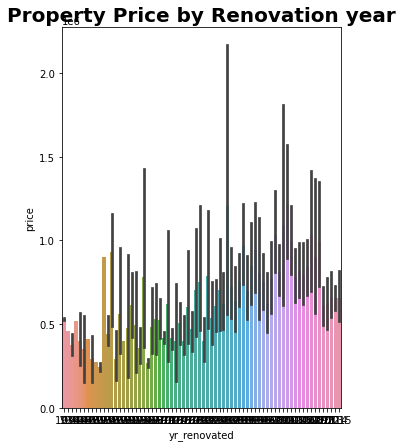

In [90]:
f_yr_renovated, ax_price = plt.subplots(figsize = (5,7))
ax_price.set_title('Property Price by Renovation year', size='20', fontweight='bold')
sns.barplot(x = numerical['yr_renovated'],y = numerical['price'], ax = ax_price)

In [91]:
categorical

waterfront view condition grade
0              0    0         3     7
1              0    0         3     7
2              0    0         3     6
3              0    0         5     7
4              0    0         3     8
...          ...  ...       ...   ...
21592          0    0         3     8
21593          0    0         3     8
21594          0    0         3     7
21595          0    0         3     8
21596          0    0         3     7

[21597 rows x 4 columns]

<AxesSubplot:xlabel='waterfront', ylabel='price'>

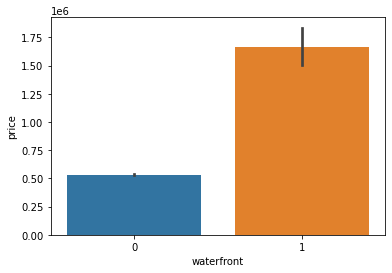

In [93]:
sns.barplot(x = df['waterfront'],y = df['price'])

<AxesSubplot:xlabel='view', ylabel='price'>

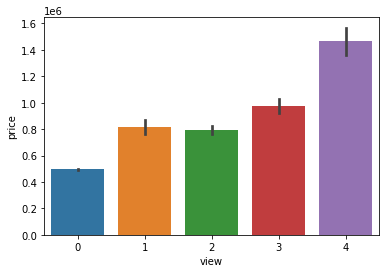

In [94]:
sns.barplot(x = df['view'],y = df['price'])

<AxesSubplot:xlabel='condition', ylabel='price'>

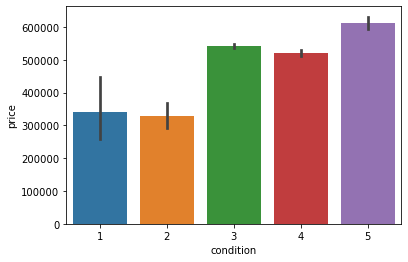

In [95]:
sns.barplot(x = df['condition'],y = df['price'])

<AxesSubplot:xlabel='grade', ylabel='price'>

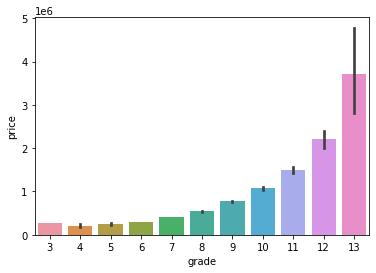

In [96]:
sns.barplot(x = df['grade'],y = df['price'])

<AxesSubplot:xlabel='zipcode', ylabel='price'>

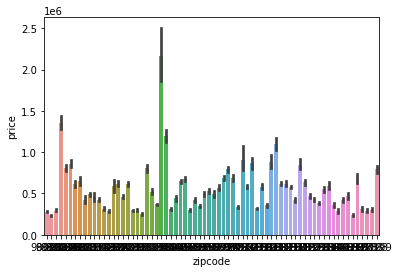

In [97]:
sns.barplot(x = df['zipcode'],y = df['price'])

In [308]:
price_zip_mean = df.groupby(['zipcode'])['price'].mean()
price_zip_mean.sort_values(ascending=False)

zipcode
98039   2161300.0000
98004   1356523.9905
98040   1194873.6383
98112   1096239.0074
98102    899607.6731
            ...     
98148    284908.5965
98001    281194.8698
98032    251296.2400
98168    240328.3717
98002    234284.0352
Name: price, Length: 70, dtype: float64

Medina, Bellevue, Mercer Island, 

In [274]:
price_zip = df.groupby(['zipcode'])['price'].mean()
pz = price_zip.sort_values(ascending=False).reset_index()
pz

zipcode        price
0     98039 2161300.0000
1     98004 1356523.9905
2     98040 1194873.6383
3     98112 1096239.0074
4     98102  899607.6731
..      ...          ...
65    98148  284908.5965
66    98001  281194.8698
67    98032  251296.2400
68    98168  240328.3717
69    98002  234284.0352

[70 rows x 2 columns]

In [275]:
Q1 = np.percentile(pz['price'], 25)
Q2 = np.percentile(pz['price'], 50)
Q3 = np.percentile(pz['price'], 75)
Q4 = np.percentile(pz['price'], 100)

354133.93507621414

In [316]:
pz['quantile_zip'] = "1"
pz['quantile_zip'] = np.where(pz['price'] >= Q1, "2", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q2, "3", pz['quantile_zip'])
pz['quantile_zip'] = np.where(pz['price'] >= Q3, "4", pz['quantile_zip'])

In [317]:
pz.groupby('quantile_zip').count()

zipcode  price  log_price  quantile_zip_log
quantile_zip                                             
1                  18     18         18                18
2                  17     17         17                17
3                  17     17         17                17
4                  18     18         18                18

<AxesSubplot:>

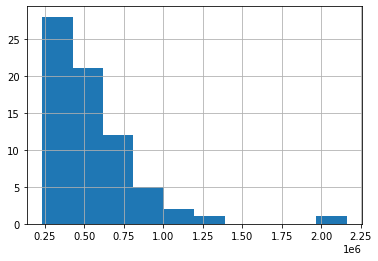

In [318]:
pz.price.hist()

In [319]:
df["yr_renovated"] = np.where (df["yr_renovated"] != 0, 1, df["yr_renovated"])

In [320]:
df

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     2014-10-13         3     1.0000         1180      5650  1.0000   
1     2014-12-09         3     2.2500         2570      7242  2.0000   
2     2015-02-25         2     1.0000          770     10000  1.0000   
3     2014-12-09         4     3.0000         1960      5000  1.0000   
4     2015-02-18         3     2.0000         1680      8080  1.0000   
...          ...       ...        ...          ...       ...     ...   
21592 2014-05-21         3     2.5000         1530      1131  3.0000   
21593 2015-02-23         4     2.5000         2310      5813  2.0000   
21594 2014-06-23         2     0.7500         1020      1350  2.0000   
21595 2015-01-16         3     2.5000         1600      2388  2.0000   
21596 2014-10-15         2     0.7500         1020      1076  2.0000   

      waterfront view condition grade  sqft_above  sqft_basement  yr_built  \
0              0    0         3     7        1180              0      1955   
1              0    0         3     7        2170            400      1951   
2              0    0         3     6         770              0      1933   
3              0    0         5     7        1050            910      1965   
4              0    0         3     8        1680              0      1987   
...          ...  ...       ...   ...         ...            ...       ...   
21592          0    0         3     8        1530              0      2009   
21593          0    0         3     8        2310              0      2014   
21594          0    0         3     7        1020              0      2009   
21595          0    0         3     8        1600              0      2004   
21596          0    0         3     7        1020              0      2008   

       yr_renovated  zipcode     lat      long  sqft_living15  sqft_lot15  \
0                 0    98178 47.5112 -122.2570           1340        5650   
1                 1    98125 47.7210 -122.3190           1690        7639   
2                 0    98028 47.7379 -122.2330           2720        8062   
3                 0    98136 47.5208 -122.3930           1360        5000   
4                 0    98074 47.6168 -122.0450           1800        7503   
...             ...      ...     ...       ...            ...         ...   
21592             0    98103 47.6993 -122.3460           1530        1509   
21593             0    98146 47.5107 -122.3620           1830        7200   
21594             0    98144 47.5944 -122.2990           1020        2007   
21595             0    98027 47.5345 -122.0690           1410        1287   
21596             0    98144 47.5941 -122.2990           1020        1357   

        price  
0      221900  
1      538000  
2      180000  
3      604000  
4      510000  
...       ...  
21592  360000  
21593  400000  
21594  402101  
21595  400000  
21596  325000  

[21597 rows x 20 columns]

In [321]:
df["yr_renovated"].value_counts()

0    20683
1      914
Name: yr_renovated, dtype: int64

In [286]:
# pz["log_price"] = np.log(pz.price.values)

<AxesSubplot:>

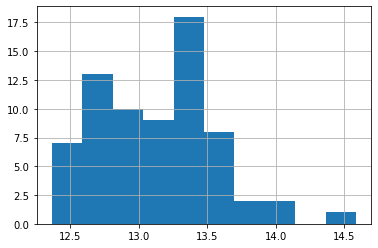

In [288]:
# pz["log_price"].hist()

In [293]:
#Q1_log = np.percentile(pz['log_price'], 25)
#Q2_log = np.percentile(pz['log_price'], 50)
#Q3_log = np.percentile(pz['log_price'], 75)
#Q4_log = np.percentile(pz['log_price'], 100)

12.777427303802718

In [295]:
#pz['quantile_zip_log'] = "least expensive"
#pz['quantile_zip_log'] = np.where(pz['log_price'] >= Q1, "moderately expensive", pz['quantile_zip_log'])
#pz['quantile_zip_log'] = np.where(pz['log_price'] >= Q2, "expensive", pz['quantile_zip_log'])
#pz['quantile_zip_log'] = np.where(pz['log_price'] >= Q3, "very expensive", pz['quantile_zip_log'])

In [322]:
pz.groupby('quantile_zip').count()

zipcode  price  log_price  quantile_zip_log
quantile_zip                                             
1                  18     18         18                18
2                  17     17         17                17
3                  17     17         17                17
4                  18     18         18                18

In [327]:
df1 = pd.merge(df, pz[['zipcode', 'quantile_zip']], on='zipcode', how='inner')

In [328]:
df1.shape

(21597, 21)

In [329]:
df.shape

(21597, 20)

In [330]:
df1

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     2014-10-13         3     1.0000         1180      5650  1.0000   
1     2014-06-23         2     1.0000          880      6780  1.0000   
2     2014-07-17         3     2.2500         2100      8201  1.0000   
3     2014-09-25         3     1.0000         1300      5898  1.0000   
4     2015-02-27         2     1.0000          860      5265  1.0000   
...          ...       ...        ...          ...       ...     ...   
21592 2014-10-03         4     3.2500         3990     18115  2.0000   
21593 2014-07-25         4     3.5000         4065     18713  2.0000   
21594 2015-04-21         5     5.2500         3410      8118  2.0000   
21595 2014-11-13         5     4.0000         5190     14600  2.0000   
21596 2015-02-27         4     3.7500         3790      8797  2.0000   

      waterfront view condition grade  sqft_above  sqft_basement  yr_built  \
0              0    0         3     7        1180              0      1955   
1              0    0         4     6         880              0      1945   
2              0    2         3     8        1620            480      1967   
3              0    0         3     7        1300              0      1961   
4              0    0         3     6         860              0      1931   
...          ...  ...       ...   ...         ...            ...       ...   
21592          0    0         4    11        3990              0      1989   
21593          0    0         4    10        4065              0      1987   
21594          0    0         3    11        3410              0      2006   
21595          0    1         3    11        5190              0      2013   
21596          0    0         3    11        3290            500      2006   

       yr_renovated  zipcode     lat      long  sqft_living15  sqft_lot15  \
0                 0    98178 47.5112 -122.2570           1340        5650   
1                 0    98178 47.5009 -122.2480           1190        6780   
2                 0    98178 47.5091 -122.2440           2660        8712   
3                 0    98178 47.5053 -122.2550           1320        7619   
4                 0    98178 47.5048 -122.2720           1650        8775   
...             ...      ...     ...       ...            ...         ...   
21592             0    98039 47.6177 -122.2290           3450       16087   
21593             0    98039 47.6209 -122.2370           3070       18713   
21594             0    98039 47.6295 -122.2360           3410       16236   
21595             0    98039 47.6102 -122.2250           3840       19250   
21596             0    98039 47.6351 -122.2360           2660       12150   

         price quantile_zip  
0       221900            1  
1       205425            1  
2       445000            1  
3       236000            1  
4       170000            1  
...        ...          ...  
21592  2720000            4  
21593  1950000            4  
21594  2250000            4  
21595  2900000            4  
21596  1870000            4  

[21597 rows x 21 columns]

## Zipcode column

In [ ]:
LabelEncoder